<a href="https://colab.research.google.com/github/harishkgithub/MLPractice/blob/master/BankLoanAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#Hk create a method for this
print("Loading bank loan data")
url = 'https://drive.google.com/file/d/1yodjQlMXU-yHVh3LOW5DC-obVqdxoJht/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
bankLoanDF = pd.read_excel(path,sheet_name='Data')

Loading bank loan data


In [16]:
bankLoanDF.shape
#we have very less data for modeling because 5000 is very less for any modeling lets proceed for now

(5000, 14)

In [19]:
bankLoanDF.describe().transpose()
#Inferences
#Age - min 23 and max 67 so the values are valid.
#This is age of Account holder

#Experince - I do not understand this I assume work experince
##### Experince min is -3 which is bad data (exp is always greater than 0)
##### 1) We need to investigate which other day are below 0 and decide what to do for those rows

#Income - Income of Account holder 
##### 2) I do not know the units is it in lacs?
##### 3) I do not know if its monthly, It should monthly because banks generally estimate based on how emi can borrower pay monthy?

#ZIP Code - Account holders residing address Zip code 
##### 4) Seems to be legitimate but we should cross check with business if the allowed data is between pin code (9307 - 96651)
##### 5) Ask bisu what to infer from mix,25%,50%,75%,max ( more data on left or more on right etc) when is it use ful?

#Family - I am not understanding what is this but let me use it as is
#CCAvg - I am not understanding what is this but let me use it as is
#Education - Seems legitimate 1 to 3 might represent UG,PG,PHD etc 
#Mortgage - I am not understanding what is this but let me use it as is
#Personal Loan -  Legitimate
#                 0 do not give loan
#                 1 can give loan
#Securities Account - I am not understanding what is this but let me use it as is
#CD Account - I am not understanding what is this but let me use it as is 
#Online - I am not understanding what is this but let me use it as is
#CreditCard -
#                 0 does not have credit card
#                 1 has credit card

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
##### 1) Experince - We need to investigate which other day are below 0 and decide what to do for those rows
##### 2) Income - I do not know the units is it in lacs?
##### 3) Income -  I do not know if its monthly, It should monthly because banks generally estimate based on how emi can borrower pay monthy?
##### 4) Zip Code - Seems to be legitimate but we should cross check with business if the allowed data is between pin code (9307 - 96651) - Low priority
##### 5) Ask bisu what to infer from mix,25%,50%,75%,max ( more data on left or more on right etc) when is it useful?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbddedb29b0>,
      dtype=object)

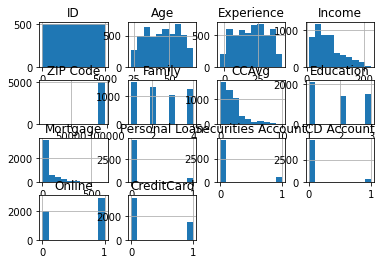

In [24]:
bankLoanDF.hist()
#After seeing this we select Age,Experience,Income,CCAvg,Mortgage as other columns are discrete not need check left or right skew

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdde5c35c0>,
      dtype=object)

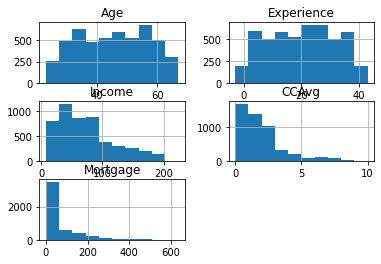

In [26]:
bankLoanDF[["Age", "Experience","Income","CCAvg","Mortgage"]].hist()

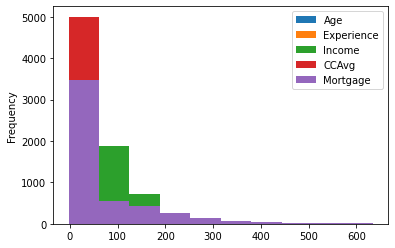

In [27]:
bankLoanDF[["Age", "Experience","Income","CCAvg","Mortgage"]].plot.hist()
#Histogram for each column
##### 6) How to understand this and what is this?
##### source - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

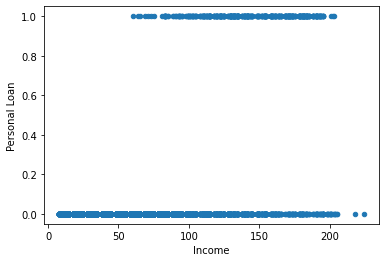

In [30]:
bankLoanDF.plot.scatter(x='Income',y='Personal Loan')
##### 7) I should not use scatter plot for classification problems?
##### source - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

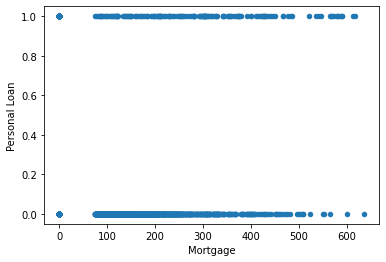

In [33]:
bankLoanDF.plot.scatter(x='Mortgage',y='Personal Loan')

In [35]:
bankLoanDF.corr()['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366891
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

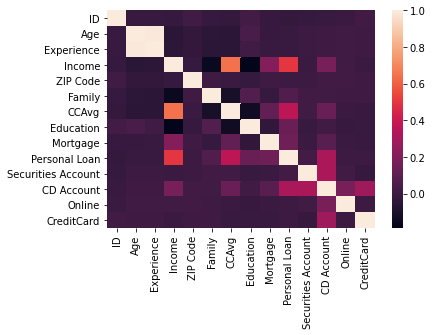

In [43]:
sns.heatmap(bankLoanDF.corr())
##### 8) Is there a way to get only with respect to Personal Loan?

Text(0.5, 0, 'Income')

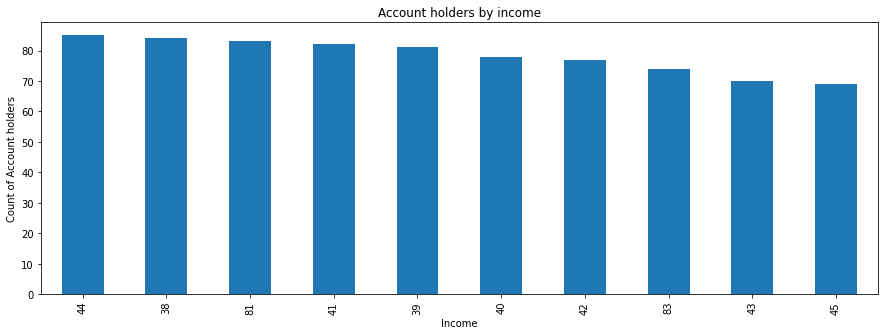

In [60]:
bankLoanDF['Income'].value_counts().nlargest(10).plot(kind='bar',figsize=(15,5))
plt.title("Account holders by income")
plt.ylabel("Count of Account holders")
plt.xlabel("Income")

In [59]:
bankLoanDF['Income'].value_counts().nlargest(10)
#bankLoanDF['Income'].nunique()
# of distinct values in a 

44    85
38    84
81    83
41    82
39    81
40    78
42    77
83    74
43    70
45    69
Name: Income, dtype: int64

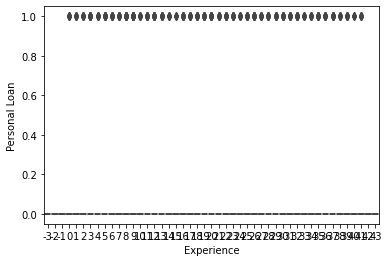

In [63]:
sns.boxplot(x="Experience",y="Personal Loan",data=bankLoanDF)
##### 8) How and when to do this?

In [11]:
#bankLoanDF.columns
bankLoanDF.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [12]:
bankLoanDF.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [13]:
bankLoanDF.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
pd.read_excel(open('Bank_Personal_Loan_Modelling.xlsx', 'rb'),sheet_name='Data')

FileNotFoundError: ignored